# HW 6: Machine Learning

Juan Vila

## Part 1

In [465]:
# python
import numpy as np
import matplotlib . pyplot as plt
from matplotlib . colors import ListedColormap
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler
from sklearn . datasets import make_circles
# create dataset
X , y = make_circles ( n_samples =400 , noise =0.2 , factor =0.5 ,
random_state =0)
X = StandardScaler (). fit_transform ( X )
X_train , X_test , y_train , y_test = train_test_split (X , y ,
test_size =.4 , random_state =42)

### Part 1A

/Users/juanvila1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: No contour levels were found within the data range.


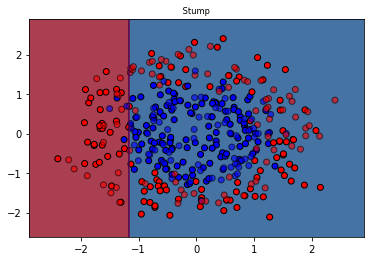

In [292]:
from sklearn . tree import DecisionTreeClassifier

clf_a = DecisionTreeClassifier(max_depth=1)
clf_a=clf_a.fit(X_train,y_train)
def score( clf , X_test , y_test ):
    y_pred = clf.predict_proba( X_test )[:,1]
    acc = sum( np.round( y_pred ) == y_test ) / len( y_test )
    return acc
# plotting
x_min , x_max = X [: , 0]. min () - .5 , X [: , 0]. max () + .5
y_min , y_max = X [: , 1]. min () - .5 , X [: , 1]. max () + .5
h = .02
xx , yy = np . meshgrid ( np . arange ( x_min , x_max , h ) ,
np . arange ( y_min , y_max , h ))
Z = clf . predict_proba( np.c_[ xx.ravel() , yy.ravel()])[: , 1]
Z = Z . reshape ( xx . shape )
plt . figure ()
plt . title (" Stump ", fontsize ="small")
cm = plt . cm . RdBu
cm_bright = ListedColormap ([ "#FF0000", "#0000FF"])
plt . contourf ( xx , yy , Z , cmap = cm , alpha =.8)
plt . contour ( xx , yy , np . round ( Z ) , 0)
plt . scatter ( X_train [: , 0] , X_train [: , 1] , marker ='o',
c = y_train , cmap = cm_bright , edgecolors ='k')
plt . scatter ( X_test [: , 0] , X_test [: , 1] , marker ='o', c = y_test ,
cmap = cm_bright , alpha =0.6 , edgecolors ='k')

In [295]:
print("test accuracy:",score( clf_a , X_test , y_test ))
print("train accuracy:",score( clf_a , X_train , y_train ))

test accuracy: 0.5375
train accuracy: 0.6666666666666666


### Part 1B

test accuracy: 0.53125
train accuracy: 0.6333333333333333


/Users/juanvila1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: No contour levels were found within the data range.


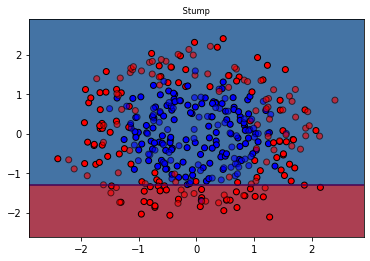

In [473]:
import copy
from sklearn.utils import resample
class Bagging ():
    def __init__ ( self , base_classifier , n_bootstrap , portion ):
        self . base_classifier = base_classifier
        self . n_bootstrap = n_bootstrap
        self . portion = portion
        self . base_classifier_list = []
    def fit ( self , X_train , y_train ):
        n_s =int(len(X_train)*self.portion)
        for i in range ( self . n_bootstrap ):
            clf = copy . deepcopy ( self . base_classifier )
            X_s, y_s = resample(X_train, y_train, random_state=42,n_samples = n_s)
            clf.fit(X_s, y_s)
            self . base_classifier_list . append ( clf )

    def predict_proba ( self , X_test ):
        average = np.empty([len(X_test), 1])
        for i in self . base_classifier_list:
            average = np.concatenate((average, i.predict_proba(X_test)[: , 1].reshape(len(X_test),1)), axis=1)

        return average.mean(axis=1)
        # RETURN AVERAGED PREDICTED PROBABILITY FOR CLASS 1
        # (THE SECOND CASE ON SLIDE 4 OF LECTURE 11)
    
    
    def score( self , X_test , y_test ):
        y_pred = self.predict_proba( X_test )
        acc = sum ( np.round( y_pred ) == y_test ) / len( y_test )
        return acc

    
    
clf_b = Bagging ( DecisionTreeClassifier ( max_depth =1) ,n_bootstrap =200 , portion =0.8)
clf_b.fit( X_train , y_train )

print("test accuracy:",clf_b.score(X_test, y_test))
print("train accuracy:",clf_b.score(X_train, y_train))

error_b=clf_b.score(X_test, y_test)
    
# plotting
x_min , x_max = X [: , 0]. min () - .5 , X [: , 0]. max () + .5
y_min , y_max = X [: , 1]. min () - .5 , X [: , 1]. max () + .5
h = .02
xx , yy = np . meshgrid ( np . arange ( x_min , x_max , h ) ,np . arange ( y_min , y_max , h ))
Z = clf_b . predict_proba( np.c_[ xx.ravel() , yy.ravel()])#[: , 1]
Z = Z . reshape ( xx . shape )
plt . figure ()
plt . title (" Stump ", fontsize ="small")
cm = plt . cm . RdBu
cm_bright = ListedColormap ([ "#FF0000", "#0000FF"])
plt . contourf ( xx , yy , Z , cmap = cm , alpha =.8)
plt . contour ( xx , yy , np . round ( Z ) , 0)
plt . scatter ( X_train [: , 0] , X_train [: , 1] , marker ='o',
c = y_train , cmap = cm_bright , edgecolors ='k')
plt . scatter ( X_test [: , 0] , X_test [: , 1] , marker ='o', c = y_test ,
cmap = cm_bright , alpha =0.6 , edgecolors ='k')

### Part 1C

In [305]:
class Boosting ():
    def __init__ ( self , base_classifier , n_iterations ):
        self . base_classifier = base_classifier
        self . n_iterations = n_iterations
        self . base_classifier_list = []
        self . alpha_list = []
    def fit ( self , X_train , y_train ):
        N=len(X_train)
        w = np.ones(N) / N
        y_train = 2 * y_train - 1
        # ADD CODES HERE

        for i in range(self.n_iterations):
            clf = copy . deepcopy ( self . base_classifier )
            clf =clf.fit(X_train, y_train,sample_weight=w.reshape(len(X_train),))
            y_proba = clf.predict_proba(X_train)[:,1]
            y_hat=np.where(y_proba>.5,1,-1)
            incorrect = (y_hat != y_train)
            error = np.mean( np.average(incorrect, weights=w, axis=0))
            alpha = np.log((1-error)/(error))
            w *= np.exp(alpha * incorrect * ((w > 0) | (w < 0)))
            self.base_classifier_list.append ( clf )
            self.alpha_list.append ( alpha )
    def predict_label ( self , X_test ):
        # RETURN A NUMBER BETWEEN -1 AND 1
        G = np.zeros((len(X_test),))
        for i,val in enumerate(self.base_classifier_list):

            G += self.alpha_list[i]*val.predict(X_test)
        G=np.where(G>0,1,-1)
        return G
    def score( self , X_test , y_test ):
        y_test = 2 * y_test - 1
        y_pred = self . predict_label ( X_test )
        acc = sum ( np . sign ( y_pred ) == y_test ) / len( y_test )
        return acc

clf_c = Boosting ( DecisionTreeClassifier ( max_depth =1) ,
n_iterations =200)
clf_c.fit ( X_train , y_train )
print("Test Accuracy:",clf_c.score( X_test , y_test ))
print("Train Accuracy:",clf_c.score( X_train , y_train ))


Test Accuracy: 0.86875
Train Accuracy: 0.95


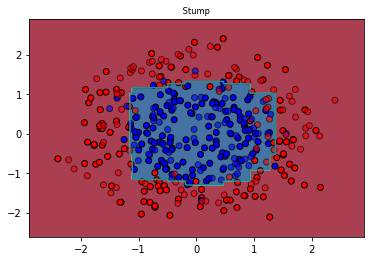

In [306]:
# PLOT FIGURE HERE
#
# plotting
x_min , x_max = X [: , 0]. min () - .5 , X [: , 0]. max () + .5
y_min , y_max = X [: , 1]. min () - .5 , X [: , 1]. max () + .5
h = .02
xx , yy = np . meshgrid ( np . arange ( x_min , x_max , h ) ,np . arange ( y_min , y_max , h ))
Z = clf_c . predict_label( np.c_[ xx.ravel() , yy.ravel()])#[: , 1]
Z = Z . reshape ( xx . shape )
plt . figure ()
plt . title (" Stump ", fontsize ="small")
cm = plt . cm . RdBu
cm_bright = ListedColormap ([ "#FF0000", "#0000FF"])
plt . contourf ( xx , yy , Z , cmap = cm , alpha =.8)
plt . contour ( xx , yy , np . round ( Z ) , 0)
plt . scatter ( X_train [: , 0] , X_train [: , 1] , marker ='o',
c = y_train , cmap = cm_bright , edgecolors ='k')
plt . scatter ( X_test [: , 0] , X_test [: , 1] , marker ='o', c = y_test ,
cmap = cm_bright , alpha =0.6 , edgecolors ='k')

## Part 1D

### Boosting

In [467]:
clf_d1_boosting = Boosting ( DecisionTreeClassifier ( max_depth =5) ,
n_iterations =200)
clf_d1_boosting.fit ( X_train , y_train )
print("Test Accuracy:",clf_d1_boosting.score( X_test , y_test ))
print("Train Accuracy:",clf_d1_boosting.score( X_train , y_train ))

Test Accuracy: 0.84375
Train Accuracy: 1.0


In [469]:
clf_d2_boosting = Boosting ( DecisionTreeClassifier ( max_depth =5) ,
n_iterations =100)
clf_d2_boosting.fit ( X_train , y_train )
print("Test Accuracy:",clf_d2_boosting.score( X_test , y_test ))
print("Train Accuracy:",clf_d2_boosting.score( X_train , y_train ))

Test Accuracy: 0.85
Train Accuracy: 1.0


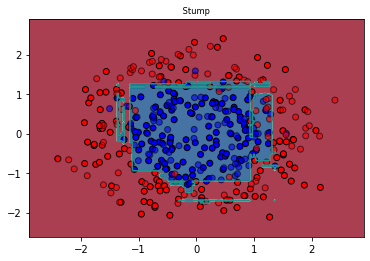

In [470]:
# PLOT FIGURE HERE
#
# plotting
x_min , x_max = X [: , 0]. min () - .5 , X [: , 0]. max () + .5
y_min , y_max = X [: , 1]. min () - .5 , X [: , 1]. max () + .5
h = .02
xx , yy = np . meshgrid ( np . arange ( x_min , x_max , h ) ,np . arange ( y_min , y_max , h ))
Z = clf_d1_boosting . predict_label( np.c_[ xx.ravel() , yy.ravel()])#[: , 1]
Z = Z . reshape ( xx . shape )
plt . figure ()
plt . title (" Stump ", fontsize ="small")
cm = plt . cm . RdBu
cm_bright = ListedColormap ([ "#FF0000", "#0000FF"])
plt . contourf ( xx , yy , Z , cmap = cm , alpha =.8)
plt . contour ( xx , yy , np . round ( Z ) , 0)
plt . scatter ( X_train [: , 0] , X_train [: , 1] , marker ='o',
c = y_train , cmap = cm_bright , edgecolors ='k')
plt . scatter ( X_test [: , 0] , X_test [: , 1] , marker ='o', c = y_test ,
cmap = cm_bright , alpha =0.6 , edgecolors ='k')

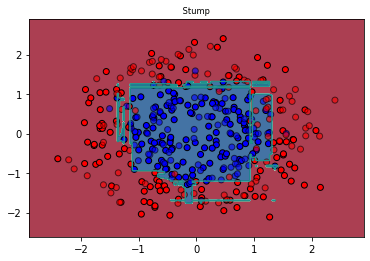

In [471]:
# PLOT FIGURE HERE
#
# plotting
x_min , x_max = X [: , 0]. min () - .5 , X [: , 0]. max () + .5
y_min , y_max = X [: , 1]. min () - .5 , X [: , 1]. max () + .5
h = .02
xx , yy = np . meshgrid ( np . arange ( x_min , x_max , h ) ,np . arange ( y_min , y_max , h ))
Z = clf_d2_boosting . predict_label( np.c_[ xx.ravel() , yy.ravel()])#[: , 1]
Z = Z . reshape ( xx . shape )
plt . figure ()
plt . title (" Stump ", fontsize ="small")
cm = plt . cm . RdBu
cm_bright = ListedColormap ([ "#FF0000", "#0000FF"])
plt . contourf ( xx , yy , Z , cmap = cm , alpha =.8)
plt . contour ( xx , yy , np . round ( Z ) , 0)
plt . scatter ( X_train [: , 0] , X_train [: , 1] , marker ='o',
c = y_train , cmap = cm_bright , edgecolors ='k')
plt . scatter ( X_test [: , 0] , X_test [: , 1] , marker ='o', c = y_test ,
cmap = cm_bright , alpha =0.6 , edgecolors ='k')

### Bagging

test accuracy: 0.81875
train accuracy: 0.8958333333333334


/Users/juanvila1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: No contour levels were found within the data range.


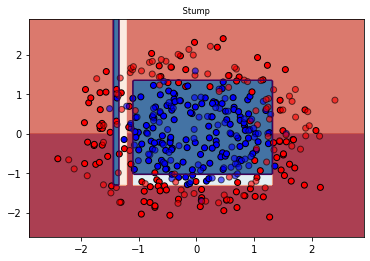

In [474]:
clf_d_bag = Bagging ( DecisionTreeClassifier ( max_depth =5) ,n_bootstrap =200 , portion =0.8)
clf_d_bag.fit( X_train , y_train )

print("test accuracy:",clf_d_bag.score(X_test, y_test))
print("train accuracy:",clf_d_bag.score(X_train, y_train))


    
# plotting
x_min , x_max = X [: , 0]. min () - .5 , X [: , 0]. max () + .5
y_min , y_max = X [: , 1]. min () - .5 , X [: , 1]. max () + .5
h = .02
xx , yy = np . meshgrid ( np . arange ( x_min , x_max , h ) ,np . arange ( y_min , y_max , h ))
Z = clf_d_bag. predict_proba( np.c_[ xx.ravel() , yy.ravel()])#[: , 1]
Z = Z . reshape ( xx . shape )
plt . figure ()
plt . title (" Stump ", fontsize ="small")
cm = plt . cm . RdBu
cm_bright = ListedColormap ([ "#FF0000", "#0000FF"])
plt . contourf ( xx , yy , Z , cmap = cm , alpha =.8)
plt . contour ( xx , yy , np . round ( Z ) , 0)
plt . scatter ( X_train [: , 0] , X_train [: , 1] , marker ='o',
c = y_train , cmap = cm_bright , edgecolors ='k')
plt . scatter ( X_test [: , 0] , X_test [: , 1] , marker ='o', c = y_test ,
cmap = cm_bright , alpha =0.6 , edgecolors ='k')

test accuracy: 0.81875
train accuracy: 0.8958333333333334


/Users/juanvila1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: No contour levels were found within the data range.


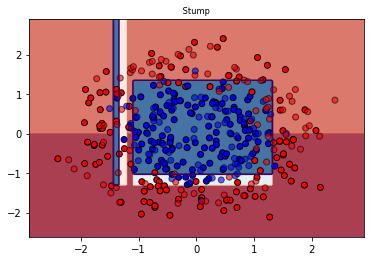

In [475]:
clf_d2_bag = Bagging ( DecisionTreeClassifier ( max_depth =5) ,n_bootstrap =300 , portion =0.8)
clf_d2_bag.fit( X_train , y_train )

print("test accuracy:",clf_d2_bag.score(X_test, y_test))
print("train accuracy:",clf_d2_bag.score(X_train, y_train))


    
# plotting
x_min , x_max = X [: , 0]. min () - .5 , X [: , 0]. max () + .5
y_min , y_max = X [: , 1]. min () - .5 , X [: , 1]. max () + .5
h = .02
xx , yy = np . meshgrid ( np . arange ( x_min , x_max , h ) ,np . arange ( y_min , y_max , h ))
Z = clf_d2_bag. predict_proba( np.c_[ xx.ravel() , yy.ravel()])#[: , 1]
Z = Z . reshape ( xx . shape )
plt . figure ()
plt . title (" Stump ", fontsize ="small")
cm = plt . cm . RdBu
cm_bright = ListedColormap ([ "#FF0000", "#0000FF"])
plt . contourf ( xx , yy , Z , cmap = cm , alpha =.8)
plt . contour ( xx , yy , np . round ( Z ) , 0)
plt . scatter ( X_train [: , 0] , X_train [: , 1] , marker ='o',
c = y_train , cmap = cm_bright , edgecolors ='k')
plt . scatter ( X_test [: , 0] , X_test [: , 1] , marker ='o', c = y_test ,
cmap = cm_bright , alpha =0.6 , edgecolors ='k')

We can see that both estimators improve, the strange thing is that boosting improve more than bagging, since bagging supposoly work best with deeper trees.

## Part 2

In [321]:
import numpy as np
import pandas as pd
df = pd . read_csv ("diabetes.csv")
df_name = df . columns
df . head ()

from sklearn . model_selection import train_test_split
from sklearn . preprocessing import MinMaxScaler
X = df [ df_name [0:8]]
y = df [ df_name [8]]
X = MinMaxScaler (). fit_transform ( X )
X_train , X_test , y_train , y_test = train_test_split (X , y ,test_size =0.25 , random_state =0 , stratify = df ["Outcome"])


## Part A

In [369]:
from sklearn . model_selection import cross_val_score
from sklearn . model_selection import StratifiedKFold
from sklearn . ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
kfold = StratifiedKFold ( n_splits =10)
cv_RF = cross_val_score ( RandomForestClassifier () ,
X_train , y_train , cv = kfold,scoring='accuracy' )
cv_LR = cross_val_score ( LogisticRegression() ,
X_train , y_train , cv = kfold,scoring='accuracy' )
cv_ADboost = cross_val_score ( AdaBoostClassifier() ,
X_train , y_train , cv = kfold,scoring='accuracy' )
cv_NB = cross_val_score ( GaussianNB() ,
X_train , y_train , cv = kfold,scoring='accuracy' )


In [370]:
names = ("Random Forest", "Log. Regression","AdBoost","Naive Bayes")
models = [cv_RF, cv_LR,cv_ADboost,cv_NB]
for i,v in enumerate(models):  
    print("CV means of {} : {}".format(names[i],v.mean()))
    print("CV STD of {} : {}".format(names[i],np.std(v)))

CV means of Random Forest : 0.756896551724138
CV STD of Random Forest : 0.036558112112674034
CV means of Log. Regression : 0.762129461584997
CV STD of Log. Regression : 0.03238580017325151
CV means of AdBoost : 0.7552329098608591
CV STD of AdBoost : 0.05411555016413558
CV means of Naive Bayes : 0.743103448275862
CV STD of Naive Bayes : 0.036787640895098686


{'whiskers': [<matplotlib.lines.Line2D at 0x1a233d54d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a233bce90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a21dd7a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a233d5f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a21e2e110>],
 'means': []}

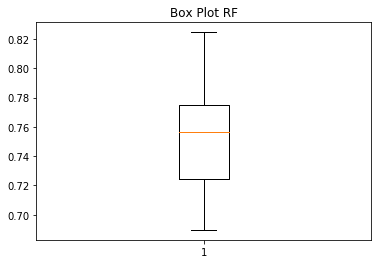

In [344]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot RF')
ax1.boxplot(cv_RF)


{'whiskers': [<matplotlib.lines.Line2D at 0x1a234ca390>,
 'caps': [<matplotlib.lines.Line2D at 0x1a234d19d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a234ca350>],
 'medians': [<matplotlib.lines.Line2D at 0x1a234caf50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a234d7950>],
 'means': []}

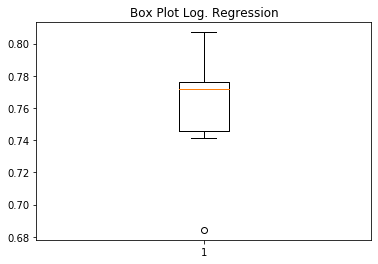

In [345]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot Log. Regression')
ax1.boxplot(cv_LR)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a235b9290>,
 'caps': [<matplotlib.lines.Line2D at 0x1a235b9a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a235a1f90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a235c2e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2350d810>],
 'means': []}

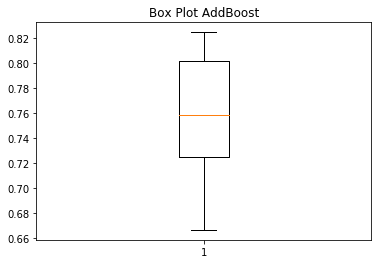

In [346]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot AddBoost')
ax1.boxplot(cv_ADboost)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a23601ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a235a8a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a23601650>],
 'medians': [<matplotlib.lines.Line2D at 0x1a235a7b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a235a8b90>],
 'means': []}

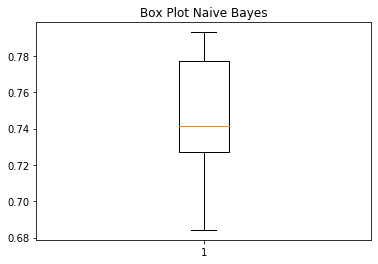

In [347]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot Naive Bayes')
ax1.boxplot(cv_NB)

## Part B

In [349]:
def removeOutliers(df_out,nameOfFeature,drop=False):
    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]

    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else:
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [360]:
df_clean = removeOutliers(df,'DiabetesPedigreeFunction',drop=True)

Number of outliers (inc duplicates): 29 and outliers: [2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.321 1.224 2.329 1.318 1.213
 1.353 1.224 1.391 1.476 2.137 1.731 1.268 1.6   2.42  1.251 1.699 1.258
 1.282 1.698 1.461 1.292 1.394]
New dataset with removed outliers has 739 samples with 9 features each.


In [367]:
df_clean
X_c = df_clean [ df_name [0:8]]
y_c = df_clean [ df_name [8]]
X_c = MinMaxScaler (). fit_transform ( X_c )
X_train_c , X_test_c , y_train_c , y_test_c = train_test_split (X_c , y_c ,test_size =0.25 , random_state =0 , stratify = df_clean ["Outcome"])
kfold = StratifiedKFold ( n_splits =10)


cv_RF_c = cross_val_score ( RandomForestClassifier () ,
X_train_c , y_train_c , cv = kfold )
cv_LR_c = cross_val_score ( LogisticRegression() ,
X_train_c , y_train_c , cv = kfold )
cv_ADboost_c = cross_val_score ( AdaBoostClassifier() ,
X_train_c , y_train_c , cv = kfold )
cv_NB_c = cross_val_score ( GaussianNB() ,
X_train_c , y_train_c , cv = kfold )


names = ("Random Forest", "Log. Regression","AdBoost","Naive Bayes")
models = [cv_RF_c, cv_LR_c,cv_ADboost_c,cv_NB_c]
for i,v in enumerate(models):  
    print("CV means of {} : {}".format(names[i],v.mean()))
    print("CV STD of {} : {}".format(names[i],np.std(v)))

CV means of Random Forest : 0.7651298701298701
CV STD of Random Forest : 0.04229192414276935
CV means of Log. Regression : 0.7742207792207791
CV STD of Log. Regression : 0.057357404199416075
CV means of AdBoost : 0.7670779220779221
CV STD of AdBoost : 0.03404486686751744
CV means of Naive Bayes : 0.7559415584415585
CV STD of Naive Bayes : 0.06837912854157013


{'whiskers': [<matplotlib.lines.Line2D at 0x1a23e048d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a23ce3d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a246dba10>],
 'medians': [<matplotlib.lines.Line2D at 0x1a23e1cd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a23e04e90>],
 'means': []}

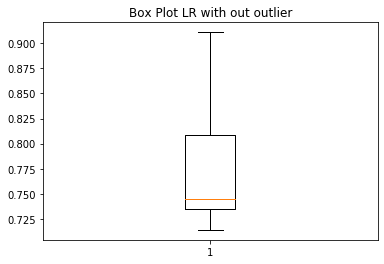

In [368]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot LR with out outlier')
ax1.boxplot(cv_LR_c)

We can see that the model with more different box plot shape is the LR model, however we see a small change in the accuracy values.

### Part C

In [394]:


n_e_list = [10,20,30,40,50,60,70,100,150,200]
column_names = ["Acc", "iter"]
result_ad = pd.DataFrame(columns = column_names)
for i in n_e_list:
    cv_ADboost_temp = cross_val_score ( AdaBoostClassifier(n_estimators=i) ,
    X_train , y_train , cv = kfold )
    iter = np.ones((10))*i
    for j in cv_ADboost_temp:
        temp = pd.DataFrame({"Acc":[j],"iter":[i]})
        result_ad = result_ad.append(temp)

result_ad['iter_mean'] = result_ad.groupby(['iter']).transform('mean')['Acc']


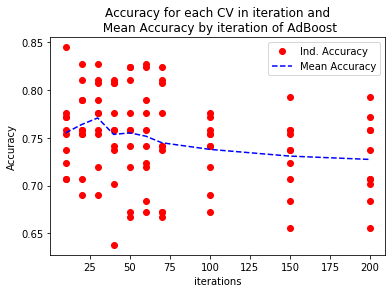

In [408]:


fig, ax = plt.subplots()
plt.plot(result_ad.iter, result_ad.Acc, 'ro',label='Ind. Accuracy')
plt.plot(result_ad.iter, result_ad.iter_mean, '--b',label='Mean Accuracy')
plt.xlabel('iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy for each CV in iteration and\n Mean Accuracy by iteration of AdBoost')
leg = ax.legend();

In [403]:


n_e_list = [10,20,30,40,50,60,70,100,150,200]
column_names = ["Acc", "iter"]
result_rf = pd.DataFrame(columns = column_names)
for i in n_e_list:
    cv_RF_temp = cross_val_score ( RandomForestClassifier (max_depth=5, bootstrap=i) ,
                               X_train , y_train , cv = kfold )
    iter = np.ones((10))*i
    for j in cv_RF_temp:
        temp = pd.DataFrame({"Acc":[j],"iter":[i]})
        result_rf = result_rf.append(temp)

result_rf['iter_mean'] = result_rf.groupby(['iter']).transform('mean')['Acc']


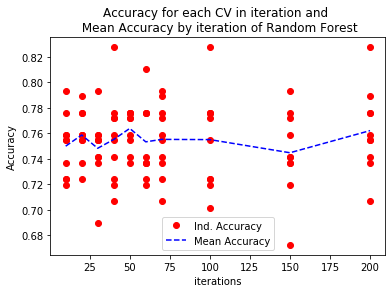

In [407]:
fig, ax = plt.subplots()
plt.plot(result_rf.iter, result_rf.Acc, 'ro',label='Ind. Accuracy')
plt.plot(result_rf.iter, result_rf.iter_mean, '--b',label='Mean Accuracy')
plt.xlabel('iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy for each CV in iteration and \n Mean Accuracy by iteration of Random Forest')
leg = ax.legend();

### Part D

I would select the random forest beaucase have higher levels of accuracy and less variance, tranforming into a more robust estimator.

## Part 3

In [476]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
import copy
from sklearn.ensemble import AdaBoostClassifier

#loading data
import numpy as np
np.random.seed(0)
mnist = sio.loadmat('mnist_data_new.mat')
train_data = mnist['train_data']
train_label = mnist['train_label'].reshape(-1)
test_data = mnist['test_data']
test_label = mnist['test_label'].reshape(-1)


### Part A

In [478]:
 
#Q a)
#ADD CODE HERE: Reshaping the data
train_data = train_data.reshape(8000,784)
test_data = test_data.reshape(1000,784)
#ADD CODES ABOVE
#implement LR on reshaped data, C is the inverse of regularization strength
C = 1
clf = LogisticRegression(random_state=0, C = C, max_iter = 4000)
#For fair comparison with Adaboost in part c), we set the sample weight in LR to be 1/n
data_weight = np.ones((train_data.shape[0],)) / train_data.shape[0]
clf.fit(train_data, train_label, sample_weight = data_weight)
#ADD CODE HERE: Report the training and testing accuracy

def score_3a( clf , X_test , y_test ):
    y_pred = clf.predict( X_test )[:,1]
    acc = sum( y_pred  == y_test ) / len( y_test )
    return acc


train_3a_acc = score( clf , train_data , train_label )
test_3a_acc =  score( clf , test_data , test_label )


#ADD CODES ABOVE

print('Testing Acc.:',test_3a_acc)
print('Train Acc.:',train_3a_acc)

Testing Acc.: 0.088
Train Acc.: 0.10475


### Part B

In [479]:

class Bagging(object):
    def __init__(self, base_classifier, b_bootstrap, m_bootstrap_size, class_num = 10):
        self.base_classifier = base_classifier
        #b_bootstrap denotes b different bootstrap samples, same as B denoted in lecture notes
        self.b_bootstrap = b_bootstrap
        self.base_classifier_list = []
        self.class_num = class_num
        #set the size of each bootstrap sample as 4000, same as m denoted in lecture notes
        self.m_bootstrap_size = m_bootstrap_size

    def fit(self , X_train , y_train ):
        for i in  range(self.b_bootstrap):
            # ADD CODES BELOW
            #bootstrap m samples from n training data with replacement
            x_sub, y_sub = resample(X_train, y_train, random_state=42,n_samples = self.m_bootstrap_size )
            # ADD CODES ABOVE
            #for fair comparison with a) and c), set the sample weight to be 1/m when fitting LR
            data_weight = np.ones((x_sub.shape[0],)) / x_sub.shape[0]
            clf = copy.deepcopy(self.base_classifier)
            #only for fair comparison with baseline, would not require for general bagging
            clf.fit(x_sub, y_sub, sample_weight = data_weight)
            self.base_classifier_list.append(clf)

    def predict(self, X_test):
        #create a n x 10 matrix for storing the result
        pred = np.zeros((X_test.shape[0], self.class_num))
        pred_list = []
        for i in range(self.b_bootstrap):
            # ADD CODES BELOW
            y_pred_i  = self.base_classifier_list[i].predict(X_test)
            for j in range(10):
                pred[:,j] += np.where(y_pred_i==j,1,0)
            # ADD CODES ABOVE
        return pred.argmax(axis = 1)
    def score( self , X_test , y_test ):
        y_pred = self.predict( X_test )
        acc = sum(  y_pred  == y_test ) / len( y_test )
        return acc

bagging = Bagging(LogisticRegression(random_state=0, C = C, max_iter = 4000), b_bootstrap = 5, m_bootstrap_size = 4000)
#ADD CODE HERE: Report the testing accuracy

#ADD CODES ABOVE
bagging.fit(train_data,train_label)
#bagging.predict(test_data)
acc_train_3b = bagging.score(train_data,train_label)
acc_test_3b = bagging.score(test_data,test_label)

print('Testing Acc.:',acc_train_3b )
print('Train Acc.:',acc_test_3b )
print('Is Training Accuracy higher in the Logistic + Bagging the the logistic regression alone?',acc_train_3b>train_3a_acc )
print('Is Testing Accuracy higher in the Logistic + Bagging the the logistic regression alone?',acc_train_3b>train_3a_acc )

Testing Acc.: 0.6545
Train Acc.: 0.633
Is Training Accuracy higher in the Logistic + Bagging the the logistic regression alone? True
Is Testing Accuracy higher in the Logistic + Bagging the the logistic regression alone? True


### Part C

In [486]:


class AdaBoosting(object):
    def __init__(self, base_classifier, b_bootstrap, class_num = 10):
        self.base_classifier = base_classifier
        #b_bootstrap denotes b different bootstrap samples, same as B in lecture notes
        self.b_bootstrap = b_bootstrap
        self.base_classifier_weight = []
        self.base_classifier_list = []
        self.class_num = class_num

    def fit(self , X_train , y_train ):
        data_weight = np.ones((X_train.shape[0],)) / X_train.shape[0]
        for i in  range(self.b_bootstrap):
            clf = copy.deepcopy(self.base_classifier)
            clf.fit(X_train, y_train, sample_weight = data_weight)
            y_pred = clf.predict(X_train)
            #ADD CODES BELOW: updating the weight
            incorrect = (y_pred != y_train)
            error = np.mean( np.average(incorrect, weights=data_weight, axis=0))
            #print(error)
            alpha = np.log((1-error)/(error))
            #alpha.reshape(1,1)
            data_weight *= np.exp(alpha * incorrect * ((data_weight > 0) | (data_weight < 0)))
            #w = w*np.exp(np.multiply(alpha,incorrect).reshape(len(X_train),1))
            #print(w.mean())


            #ADD CODES ABOVE: updating the weight
            self.base_classifier_list.append(clf)
            self.base_classifier_weight.append(alpha)

    def predict(self, X_test):
        pred = np.zeros((X_test.shape[0], self.class_num))
        pred_list = []
        for i in range(self.b_bootstrap):
            y_pred = self.base_classifier_list[i].predict(X_test)
                #ADD CODES HERE
            #print(y_pred)
            pred[np.arange(y_pred.shape[0]),y_pred] += self.base_classifier_weight[i]
        print(pred.shape)
        return pred.argmax(axis = 1)
    def score( self , X_test , y_test ):
        y_pred = self.predict( X_test )
        acc = sum(  y_pred  == y_test ) / len( y_test )
        return acc

adaboost = AdaBoosting(LogisticRegression(random_state=0, C = C, max_iter = 4000), b_bootstrap = 10)
adaboost.fit(train_data, train_label)
acc_train_3c = adaboost.score(train_data, train_label)
acc_test_3c = adaboost.score(test_data, test_label)
    #ADD CODES HERE: Report the testing accuracy

    #ADD CODES ABOVE
print('Testing Acc.:',acc_train_3c)
print('Train Acc.:',acc_test_3c)
print('Is Training Accuracy higher in the Adaboost Logistic than the logistic regression alone?',acc_train_3c>train_3a_acc )
print('Is Testing Accuracy higher in the Adaboost Logistic than the logistic regression alone?',acc_train_3c>train_3a_acc )

(8000, 10)
(1000, 10)
Testing Acc.: 0.739125
Train Acc.: 0.718
Is Training Accuracy higher in the Adaboost Logistic than the logistic regression alone? True
Is Testing Accuracy higher in the Adaboost Logistic than the logistic regression alone? True


In [482]:
np.unique(adaboost.predict(test_data))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [493]:
z = AdaBoostClassifier(LogisticRegression(random_state=0, C = C, max_iter = 4000), n_estimators=5)
z.fit(train_data, train_label)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=4000,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=0,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=5, random_state=None)

In [495]:
z.score(test_data,test_label)

0.728